In [32]:
import pandas as pd
import os
import numpy as np
import glob
import matplotlib.pyplot as plt

%matplotlib inline

# Sakernas
**As our benchmark data based on assumption that sakernas more respresentatice because have larger sample.**

In [33]:
sakernas = pd.read_stata("sak_0814.dta")
sakernas = sakernas[sakernas["b4_k5"] < 25]
sakernas.sample(5)

,d_r,weight,tahun,kode_pro,nprop,kode_kab,nkab,klasifik_daerah,b4_k3,b4_k4,...,ki45,muda,umur1824,kwsn_industri,upahrata2,anak,ankbekerja,pkrjaanak,keg_ank,jmkrjaanak
436713,,242,20148,74,74_Sulawesi_Tenggara,4,Kab. Kolaka,perkotaan,3,perempuan,...,2. informal,1.0,1.0,NaN,<= rp 1.746.304,NaN,NaN,NaN,bekerja dan mengurus rumah tangga,NaN
90912,,154,20148,16,16_Sumatera_Selatan,2,Kab. Ogan Komering Ilir,perkotaan,3,laki-laki,...,NaN,1.0,1.0,NaN,<= rp 1.746.304,NaN,NaN,NaN,tidak memiliki kegiatan,NaN
366219,,501,20148,63,63_Kalimantan_Selata,2,Kab. Kota Baru,perdesaan,2,perempuan,...,NaN,1.0,1.0,NaN,<= rp 1.746.304,NaN,NaN,NaN,mengurus rumah tangga saja,NaN
99005,,175,20148,16,16_Sumatera_Selatan,9,Kab. Ogan Komering Ulu Timur,perkotaan,3,laki-laki,...,2. informal,1.0,1.0,NaN,<= rp 1.746.304,NaN,NaN,NaN,tidak memiliki kegiatan,NaN
349106,,58,20148,61,61_Kalimantan_Barat,9,Kab. Sekadau,perkotaan,5,laki-laki,...,NaN,1.0,1.0,NaN,<= rp 1.746.304,NaN,NaN,NaN,sekolah saja,NaN


In [34]:
pd.crosstab(sakernas["b5_r2b"], sakernas["b5_r1c"], margins=True)
#b5_r1c, 1: Yes; 2:No
#b5_r2b, 1: Work; 2: School; 3:Household stuff ; 4:Other thing

b5_r1c,1,2,All
b5_r2b,,,
1,1189,30625,31814
2,414,44621,45035
3,419,17603,18022
4,279,10314,10593
All,2301,103163,105464


In [35]:
neets_sakernas = (17603 + 10314) / 105464
print ("Based on sakernas, the propotion of NEETs in Indonesia equal to" , round(neets_sakernas * 100, 2) , "% -", len(sakernas))

Based on sakernas, the propotion of NEETs in Indonesia equal to 26.47 % - 105464


In [36]:
sakernas["bak_kategori"].unique()

[NaN, sekolah, mengurus rumah tangga, lainnya]
Categories (3, object): [sekolah < mengurus rumah tangga < lainnya]

In [37]:
pd.read_stata("sak_0814.dta", iterator=True).variable_labels()

{'d_r': '',
 'weight': '',
 'tahun': '',
 'kode_pro': '',
 'nprop': '',
 'kode_kab': '',
 'nkab': '',
 'klasifik_daerah': 'daerah',
 'b4_k3': 'hubungan dengan kepala rumah tangga (krt)',
 'b4_k4': 'jenis kelamin',
 'b4_k5': 'umur',
 'b4_k6': 'status perkawinan',
 'b4_k7': 'partisipasi sekolah',
 'b5_r1a': '1a pendidikan tertinggi yang ditamatkan',
 'b5_r1b': '1b jurusan pendidikan / bidang studi',
 'b5_r1c': '1c mengikuti pelatihan / kursus',
 'b5_r1d1': '1d1 pelatihan / kursus ke 1',
 'b5_r1d2': '1d2 pelatihan / kursus ke 2',
 'b5_r2a1': '2a1 bekerja seminggu yang lalu',
 'b5_r2a2': '2a2 sekolah seminggu yang lalu',
 'b5_r2a3': '2a3 mengurus rt seminggu yang lalu',
 'b5_r2a4': '2a4 lainnya, selain kegiatan pribadi',
 'b5_r2b': '2b kegiatan terbanyak dari b5p2a',
 'b5_r3': '3 sementara tidak bekerja?',
 'b5_r4': '4 sedang mencari pekerjaan?',
 'b5_r5': '5 sedang mempersiapkan usaha baru?',
 'b5_r6': '6 alasan utama tidak mencari pekerjaan/mempersiapkan usaha',
 'b5_r7': '7 masih mau me

# IFLS

In [38]:
a=pd.read_stata("b3a_cov.dta")
b=pd.read_stata("b3a_tk1.dta")
c=pd.read_stata("b3a_tk2.dta")

a.set_index(["hhid14_9", "pid14"], inplace=True)
b.set_index(["hhid14_9", "pid14"], inplace=True)
c.set_index(["hhid14_9", "pid14"], inplace=True)

In [39]:
z = pd.concat([a, b, c], axis=1)
# our interest just people in youth age (15-24 based on ILO standard)
z = z[z["age"] < 25]

In [40]:
z["tk01"].value_counts(dropna=False)

3:Attending school                                     2652
1:Working/trying to get work/helping to earn income    2583
4:Housekeeping                                         1436
NaN                                                     393
95:Other                                                324
2:Job searching                                         222
7:Sick/disable                                           53
5:Retired                                                 0
Name: tk01, dtype: int64

In [41]:
z.columns

Index(['idivwr', 'resvis', 'rspndnt', 'panel', 'age', 'marstat', 'sex',
       'dob_day', 'dob_mth', 'dob_yr',
       ...
       'tk25b1', 'tk25b2', 'tk25b2b', 'tk23bx', 'tk23b2mx', 'tk23b2yx',
       'version', 'module', 'tk26b1', 'tk26b3'],
      dtype='object', length=222)

In [42]:
pd.read_stata("b3a_tk1.dta", iterator=True).variable_labels()

{'hhid14_9': '2014 Household ID (9-digit)',
 'pid14': '2014 PID',
 'tk01a': 'During the past week',
 'tk01b': 'During the past week',
 'tk01c': 'During the past week',
 'tk01d': 'During the past week',
 'tk01': 'Primary activity during past week',
 'tk02': 'Did you work for pay at least 1 hr lst/wk?',
 'tk03': 'Do you have a job but didnt work lst/wk?',
 'tk04': 'Did you work in family-owned bus lst/wk?',
 'tk05': 'Have you ever worked before?',
 'tk06a': 'Did you last work in 2006 or later?',
 'tkp07x': 'When did you work for the last time?',
 'tk07': 'Year you worked for last time',
 'tk08': 'Why havent you worked again since then?',
 'tk15': 'Primary work status - last job',
 'tk16ax': 'What was your monthly income when you were working at that job? (able to answer)',
 'tk16a1': 'Unfolding brackets: was it [...] ?',
 'tk16b': 'Source of income from last job',
 'tk16cart': 'PID of employer',
 'tk16c1': 'How satisfied are you with your current job?',
 'tk16d': 'Are you curently lookin

**We ignore the missing values of tk01 column (main activity last week) because relatively small**

### Def Training 1st ( tk25a9x ) -- Last year got training?

In [43]:
z["tk25a9x"].unique()

[NaN, 2:Less than a week, 1:Receive, 3:Not receive any training in the last 12 months]
Categories (3, object): [1:Receive < 2:Less than a week < 3:Not receive any training in the last 12 months]

In [44]:
# without imputation
pd.crosstab(z["tk01"], z["tk25a9x"], margins=True)

tk25a9x,1:Receive,2:Less than a week,3:Not receive any training in the last 12 months,All
tk01,,,,
1:Working/trying to get work/helping to earn income,262,127,105,494
2:Job searching,3,1,1,5
3:Attending school,7,11,5,23
4:Housekeeping,9,3,5,17
7:Sick/disable,0,1,0,1
95:Other,6,6,2,14
All,287,149,118,554


In [45]:
one = z.copy()
one = one[["tk01", "tk25a9x"]].dropna()
neet1 = one[((one["tk25a9x"] == "3:Not receive any training in the last 12 months")) & ((one["tk01"] == "2:Job searching") | (one["tk01"] == "4:Housekeeping") | (one["tk01"] == "7:Sick/disable") | (one["tk01"] == "95:Other"))]
eet1 = one[~(((one["tk25a9x"] == "3:Not receive any training in the last 12 months")) & ((one["tk01"] == "2:Job searching") | (one["tk01"] == "4:Housekeeping") | (one["tk01"] == "7:Sick/disable") | (one["tk01"] == "95:Other")))]
eet1

,,tk01,tk25a9x
hhid14_9,pid14,,
001224200,1.0,3:Attending school,2:Less than a week
002010008,1.0,1:Working/trying to get work/helping to earn i...,2:Less than a week
003104100,3.0,2:Job searching,1:Receive
003294100,8.0,1:Working/trying to get work/helping to earn i...,1:Receive
004100000,9.0,1:Working/trying to get work/helping to earn i...,3:Not receive any training in the last 12 months
...,...,...,...
317144200,1.0,1:Working/trying to get work/helping to earn i...,2:Less than a week
317230003,1.0,1:Working/trying to get work/helping to earn i...,2:Less than a week
320100000,6.0,1:Working/trying to get work/helping to earn i...,2:Less than a week


In [46]:
neets1 = (1 + 5 + 2)/ 554
print ("Based on IFLS (scheme 1), the propotion of NEETs in Indonesia equal to" , round(neets1 * 100, 2) , "% -(n=554)")

Based on IFLS (scheme 1), the propotion of NEETs in Indonesia equal to 1.44 % -(n=554)


In [47]:
# with imputation
imp = z["tk25a9x"].fillna("3:Not receive any training in the last 12 months").astype("str")
pd.crosstab(z["tk01"], imp, margins=True)

tk25a9x,1:Receive,2:Less than a week,3:Not receive any training in the last 12 months,All
tk01,,,,
1:Working/trying to get work/helping to earn income,262,127,2194,2583
2:Job searching,3,1,218,222
3:Attending school,7,11,2634,2652
4:Housekeeping,9,3,1424,1436
7:Sick/disable,0,1,52,53
95:Other,6,6,312,324
All,287,149,6834,7270


In [48]:
two = z.copy()
two = two[["tk01", "tk25a9x"]]
two["tk25a9x"] = two["tk25a9x"].fillna("3:Not receive any training in the last 12 months").astype("str")
neet2 = two[((two["tk25a9x"] == "3:Not receive any training in the last 12 months")) & ((two["tk01"] == "2:Job searching") | (two["tk01"] == "4:Housekeeping") | (two["tk01"] == "7:Sick/disable") | (two["tk01"] == "95:Other"))]
eet2 = two[~(((two["tk25a9x"] == "3:Not receive any training in the last 12 months")) & ((two["tk01"] == "2:Job searching") | (two["tk01"] == "4:Housekeeping") | (two["tk01"] == "7:Sick/disable") | (two["tk01"] == "95:Other")))]
eet2

tk01  \
hhid14_9  pid14                                                      
001060000 8.0                                   3:Attending school   
001220009 1.0                                   3:Attending school   
001224100 3.0                                   3:Attending school   
001224200 1.0                                   3:Attending school   
001240000 12.0   1:Working/trying to get work/helping to earn i...   
...                                                            ...   
321280000 12.0   1:Working/trying to get work/helping to earn i...   
321290000 6.0                                   3:Attending school   
          7.0    1:Working/trying to get work/helping to earn i...   
321291100 3.0                                   3:Attending school   
          4.0                                   3:Attending school   

                                                          tk25a9x  
hhid14_9  pid14                                                    
001060000 8.0    3:Not receive any training in the last 12 months  
001220009 1.0    3:Not receive any training in the last 12 months  
001224100 3.0    3:Not receive any training in the last 12 months  
001224200 1.0                                  2:Less than a week  
001240000 12.0   3:Not receive any training in the last 12 months  
...                                                           ...  
321280000 12.0   3:Not receive any training in the last 12 months  
321290000 6.0    3:Not receive any training in the last 12 months  
          7.0    3:Not receive any training in the last 12 months  
321291100 3.0    3:Not receive any training in the last 12 months  
          4.0    3:Not receive any training in the last 12 months  

[5657 rows x 2 columns]

In [49]:
neets2 = (218 + 1424 + 52 + 312)/ 7270
print ("Based on IFLS (scheme 2), the propotion of NEETs in Indonesia equal to" , round(neets2 * 100, 2) , "% -(n=7270)")

Based on IFLS (scheme 2), the propotion of NEETs in Indonesia equal to 27.59 % -(n=7270)


In [50]:
ha = pd.merge(neet2, z.copy(), left_index=True, right_index=True, how="inner")
ha

,,tk01_x,tk25a9x_x,idivwr,resvis,rspndnt,panel,age,marstat,sex,dob_day,...,tk25b1,tk25b2,tk25b2b,tk23bx,tk23b2mx,tk23b2yx,version,module,tk26b1,tk26b3
hhid14_9,pid14,,,,,,,,,,,,,,,,,,,,,
001290005,4.0,4:Housekeeping,3:Not receive any training in the last 12 months,A36,1:Yes,2:Spouse of head,3:New,21,2:Married,3:Female,98:Don't Know,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002020000,11.0,4:Housekeeping,3:Not receive any training in the last 12 months,A34,1:Yes,2:Spouse of head,3:New,22,2:Married,3:Female,15,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN
002180000,10.0,4:Housekeeping,3:Not receive any training in the last 12 months,A35,1:Yes,3:Other HH member,3:New,19,1:Not yet married,3:Female,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002184100,2.0,4:Housekeeping,3:Not receive any training in the last 12 months,A34,1:Yes,3:Other HH member,1:Panel,24,2:Married,3:Female,17,...,NaN,NaN,NaN,1.0,1.0,3.0,1.3,B3A_TK2,170000.0,170000.0
002190000,4.0,4:Housekeeping,3:Not receive any training in the last 12 months,A31,1:Yes,3:Other HH member,1:Panel,21,1:Not yet married,3:Female,31,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321260000,8.0,4:Housekeeping,3:Not receive any training in the last 12 months,W32,1:Yes,3:Other HH member,3:New,18,1:Not yet married,3:Female,21,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN
321260006,2.0,4:Housekeeping,3:Not receive any training in the last 12 months,W31,1:Yes,2:Spouse of head,1:Panel,24,2:Married,3:Female,22,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN
321260007,2.0,4:Housekeeping,3:Not receive any training in the last 12 months,W32,1:Yes,2:Spouse of head,1:Panel,22,2:Married,3:Female,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
ha[["tk01a", "tk01b", "tk01c", "tk01d"]]

,,tk01a,tk01b,tk01c,tk01d
hhid14_9,pid14,,,,
001290005,4.0,3:No,3:No,1:Yes,3:No
002020000,11.0,3:No,3:No,1:Yes,3:No
002180000,10.0,3:No,3:No,1:Yes,3:No
002184100,2.0,3:No,3:No,1:Yes,3:No
002190000,4.0,1:Yes,3:No,1:Yes,3:No
...,...,...,...,...,...
321260000,8.0,1:Yes,3:No,1:Yes,3:No
321260006,2.0,1:Yes,3:No,1:Yes,3:No
321260007,2.0,3:No,3:No,1:Yes,3:No


In [52]:
ha["tk16h"].value_counts(dropna=False)[ha["tk16h"].value_counts(dropna=False) != 0]

4:Housekeeping                    925
NaN                               547
95:Other                          215
3:Attending school                136
2:Already has a job                88
1:Feel imposible to find a job     44
6:Do not need to                   30
7:Do not able to do work           15
5:Already has a business            6
Name: tk16h, dtype: int64

In [53]:
pd.crosstab(ha["age"], ha["sex"], margins=True, normalize=True)

sex,1:Male,3:Female,All
age,,,
14.0,0.000000,0.000499,0.000499
15.0,0.017448,0.029412,0.046859
16.0,0.018445,0.025424,0.043868
17.0,0.018445,0.044367,0.062812
18.0,0.031406,0.067797,0.099202
19.0,0.030409,0.077268,0.107677
20.0,0.025424,0.089232,0.114656
21.0,0.027916,0.095713,0.123629
22.0,0.021436,0.097208,0.118644


In [54]:
pd.crosstab(ha["tk01_x"], ha["sex"], margins=True, normalize=True)

sex,1:Male,3:Female,All
tk01_x,,,
2:Job searching,0.075773,0.032901,0.108674
4:Housekeeping,0.033400,0.676471,0.709870
7:Sick/disable,0.015454,0.010469,0.025922
95:Other,0.112164,0.043370,0.155533
All,0.236790,0.763210,1.000000


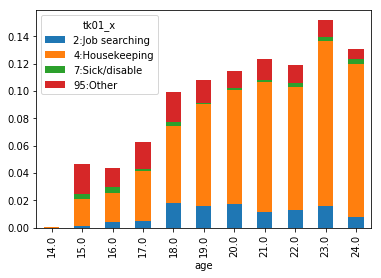

In [55]:
pd.crosstab(ha["age"], ha["tk01_x"], normalize=True).plot.bar(stacked=True)

In [56]:
ha["age"].value_counts(dropna=False)[ha["age"].value_counts(dropna=False) != 0]

23.0    304
24.0    262
21.0    248
22.0    238
20.0    230
19.0    216
18.0    199
17.0    126
15.0     94
16.0     88
14.0      1
Name: age, dtype: int64

### Def Training 1st ( tk25a8 ) -- ever got training?

In [57]:
#without imputation
pd.crosstab(z["tk01"], z["tk25a8"], margins=True)

tk25a8,1:Yes,3:No,9:Missing,All
tk01,,,,
1:Working/trying to get work/helping to earn income,494,1114,2,1610
2:Job searching,5,25,0,30
3:Attending school,23,63,0,86
4:Housekeeping,17,62,0,79
7:Sick/disable,1,4,0,5
95:Other,14,21,0,35
All,554,1289,2,1845


In [58]:
three = z.copy()
three = three[["tk01", "tk25a8"]].dropna()
neet3 = three[((three["tk25a8"] == "3:No")) & ((three["tk01"] == "2:Job searching") | (three["tk01"] == "4:Housekeeping") | (three["tk01"] == "7:Sick/disable") | (three["tk01"] == "95:Other"))]
eet3 = three[~(((three["tk25a8"] == "3:No")) & ((three["tk01"] == "2:Job searching") | (three["tk01"] == "4:Housekeeping") | (three["tk01"] == "7:Sick/disable") | (three["tk01"] == "95:Other")))]
eet3

,,tk01,tk25a8
hhid14_9,pid14,,
001224200,1.0,3:Attending school,1:Yes
001240000,16.0,3:Attending school,3:No
002010006,2.0,1:Working/trying to get work/helping to earn i...,3:No
002010008,1.0,1:Working/trying to get work/helping to earn i...,1:Yes
002040006,1.0,1:Working/trying to get work/helping to earn i...,3:No
...,...,...,...
321143100,3.0,1:Working/trying to get work/helping to earn i...,1:Yes
321174100,3.0,1:Working/trying to get work/helping to earn i...,3:No
321200000,5.0,1:Working/trying to get work/helping to earn i...,3:No


In [59]:
neets3 = (25 + 62 + 4 + 21)/ 1845
print ("Based on IFLS (scheme 3), the propotion of NEETs in Indonesia equal to" , round(neets3 * 100, 2) , "% -(n=1845)")

Based on IFLS (scheme 3), the propotion of NEETs in Indonesia equal to 6.07 % -(n=1845)


In [60]:
#imputation with all no
io = z["tk25a8"].astype("str").str.replace("nan", "3:No")
pd.crosstab(z["tk01"], io, margins=True)

tk25a8,1:Yes,3:No,9:Missing,All
tk01,,,,
1:Working/trying to get work/helping to earn income,494,2087,2,2583
2:Job searching,5,217,0,222
3:Attending school,23,2629,0,2652
4:Housekeeping,17,1419,0,1436
7:Sick/disable,1,52,0,53
95:Other,14,310,0,324
All,554,6714,2,7270


In [61]:
four = z.copy()
four = four[["tk01", "tk25a8"]]
four["tk25a8"] = four["tk25a8"].astype("str").str.replace("nan", "3:No")
neet4 = four[((four["tk25a8"] == "3:No")) & ((four["tk01"] == "2:Job searching") | (four["tk01"] == "4:Housekeeping") | (four["tk01"] == "7:Sick/disable") | (four["tk01"] == "95:Other"))]
eet4 = four[~(((four["tk25a8"] == "3:No")) & ((four["tk01"] == "2:Job searching") | (four["tk01"] == "4:Housekeeping") | (four["tk01"] == "7:Sick/disable") | (four["tk01"] == "95:Other")))]
eet4

tk01 tk25a8
hhid14_9  pid14                                                          
001060000 8.0                                   3:Attending school   3:No
001220009 1.0                                   3:Attending school   3:No
001224100 3.0                                   3:Attending school   3:No
001224200 1.0                                   3:Attending school  1:Yes
001240000 12.0   1:Working/trying to get work/helping to earn i...   3:No
...                                                            ...    ...
321280000 12.0   1:Working/trying to get work/helping to earn i...   3:No
321290000 6.0                                   3:Attending school   3:No
          7.0    1:Working/trying to get work/helping to earn i...   3:No
321291100 3.0                                   3:Attending school   3:No
          4.0                                   3:Attending school   3:No

[5665 rows x 2 columns]

In [62]:
neets4 = (217 + 1419 + 52 + 310)/ 7270
print ("Based on IFLS (scheme 3), the propotion of NEETs in Indonesia equal to" , round(neets4 * 100, 2) , "% -(n=7270)")

Based on IFLS (scheme 3), the propotion of NEETs in Indonesia equal to 27.48 % -(n=7270)
